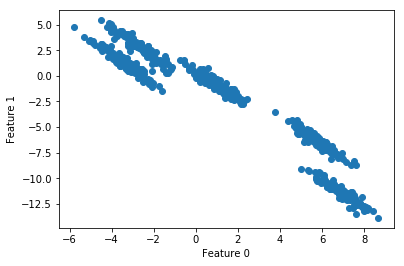

In [1]:
# plot graphics in the notebook 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

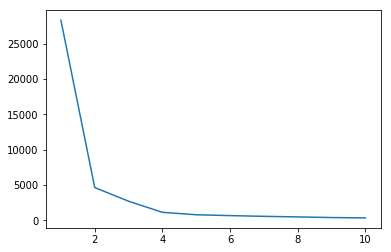

In [4]:
lengths = list()
for i in range(1,11):
    km = KMeans(n_clusters=i,n_jobs=-1)
    km.fit(X,y)
    lengths.append(km.inertia_)
plt.plot(range(1,11),lengths)

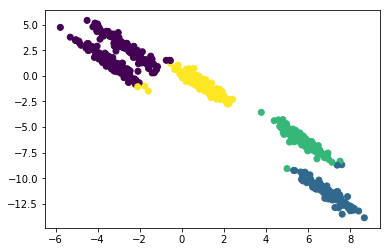

In [10]:
y_pred = KMeans(n_clusters=4,n_jobs=-1).fit_predict(X)
plt.scatter(X[:, 0],X[:, 1],c=y_pred)

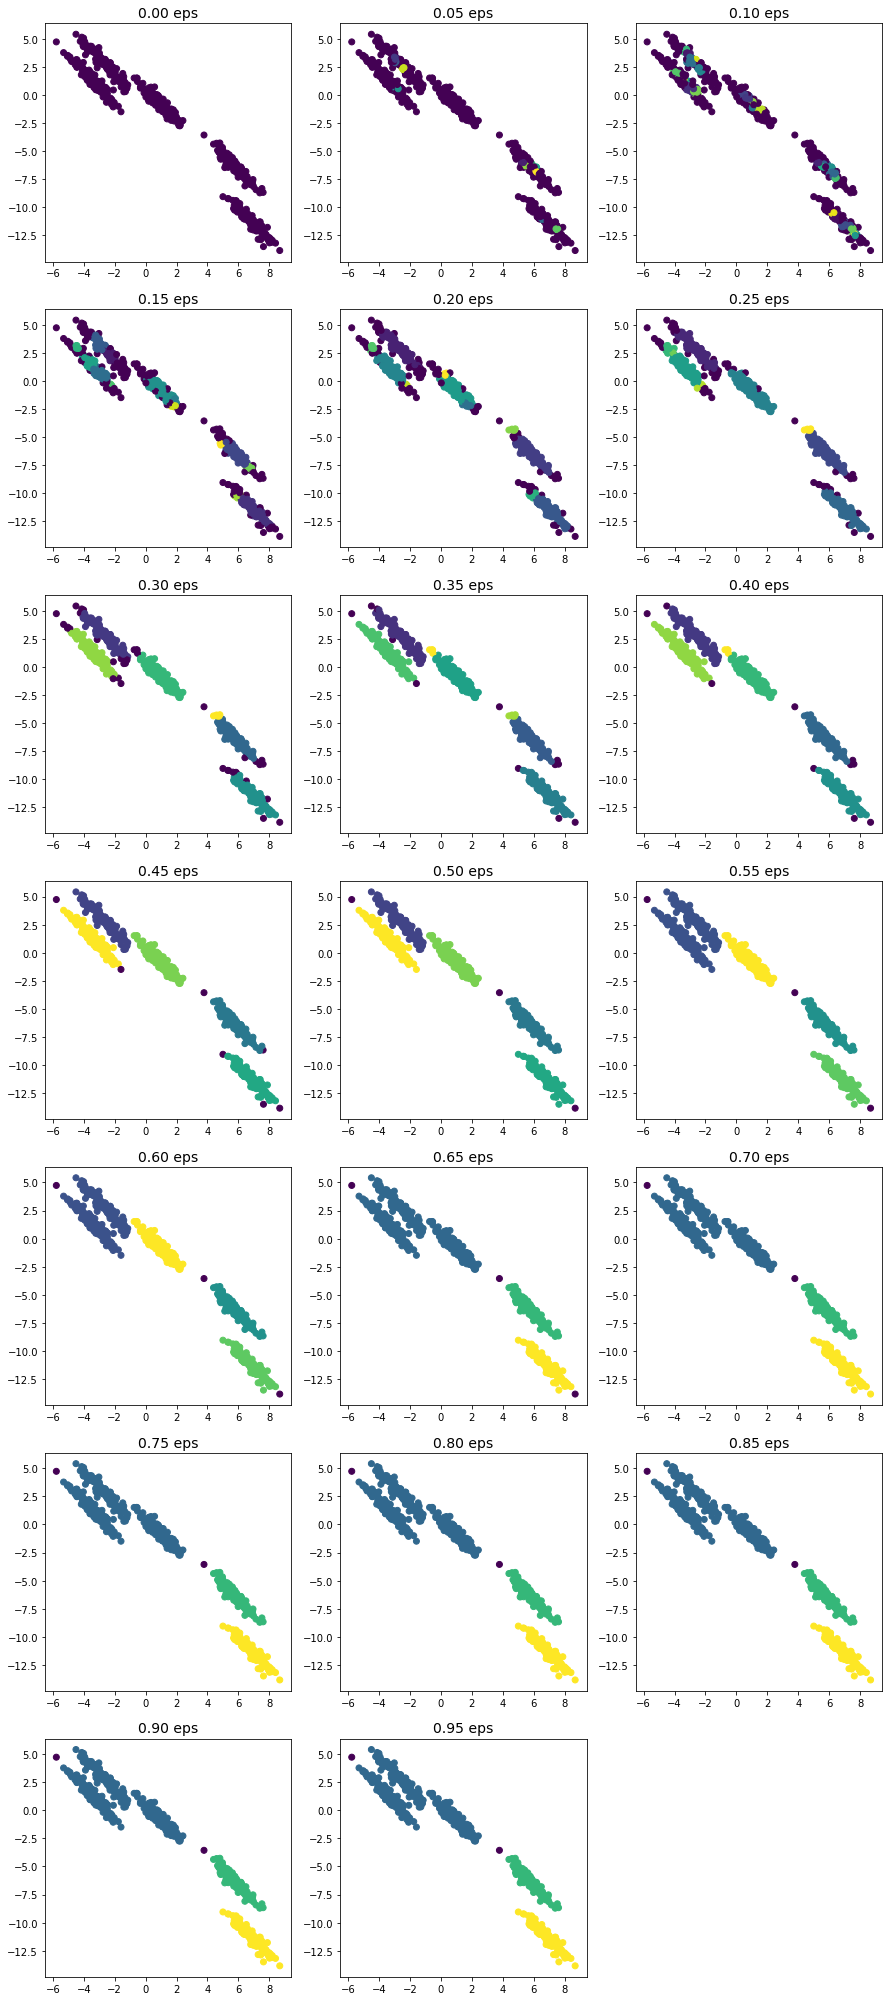

In [21]:
from sklearn.cluster import DBSCAN
def plot_clustering(batch,scan,columns=3):
    plt.subplots(figsize=(15,10))
    plt.subplots_adjust(top=8)

    for i in range(batch):
        y_pred = scan[i].fit_predict(X)
        plt.subplot(batch, columns, i+1)
        plt.scatter(X[:, 0],X[:, 1],c=y_pred)
            
        plt.title('%.2f eps'%(0.05*i),fontsize=14)
    
models = list()
batch_size = 20
for i in range(1,batch_size+1):
    db = DBSCAN(eps=i*0.05,n_jobs=-1)
    models.append(db)
plot_clustering(batch_size,models)